In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go


In [23]:
housing_data = pd.read_csv('housing_all.csv')


In [3]:
print(housing_data)


        year  month        town  flat_type storey_range  floor_area_sqm  \
0       1990      1  ANG MO KIO     1 ROOM     10 TO 12            31.0   
1       1990      1  ANG MO KIO     1 ROOM     04 TO 06            31.0   
2       1990      1  ANG MO KIO     1 ROOM     10 TO 12            31.0   
3       1990      1  ANG MO KIO     1 ROOM     07 TO 09            31.0   
4       1990      1  ANG MO KIO     3 ROOM     04 TO 06            73.0   
...      ...    ...         ...        ...          ...             ...   
940734  2024     11      YISHUN     5 ROOM     07 TO 09           112.0   
940735  2024     11      YISHUN     5 ROOM     10 TO 12           113.0   
940736  2024     11      YISHUN     5 ROOM     01 TO 03           122.0   
940737  2024     11      YISHUN  EXECUTIVE     04 TO 06           148.0   
940738  2024     11      YISHUN  EXECUTIVE     01 TO 03           142.0   

            flat_model  lease_commence_date  remaining_lease  resale_price  
0             IMPROVED

In [4]:
housing_data.describe()

,year,month,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
count,940739.000000,940739.000000,940739.000000,940739.000000,940739.000000,9.407390e+05
mean,2006.425917,6.576067,95.686183,1988.418313,80.973216,3.251278e+05
std,9.494460,3.400737,25.802357,10.805266,10.846909,1.745527e+05
min,1990.000000,1.000000,28.000000,1966.000000,41.000000,5.000000e+03
25%,1999.000000,4.000000,73.000000,1981.000000,74.000000,1.950000e+05
50%,2005.000000,7.000000,93.000000,1986.000000,83.000000,3.000000e+05
75%,2014.000000,10.000000,113.000000,1996.000000,90.000000,4.210000e+05
max,2024.000000,12.000000,366.700000,2021.000000,101.000000,1.588000e+06


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940739 entries, 0 to 940738
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 940739 non-null  int64  
 1   month                940739 non-null  int64  
 2   town                 940739 non-null  object 
 3   flat_type            940739 non-null  object 
 4   storey_range         940739 non-null  object 
 5   floor_area_sqm       940739 non-null  float64
 6   flat_model           940739 non-null  object 
 7   lease_commence_date  940739 non-null  int64  
 8   remaining_lease      940739 non-null  int64  
 9   resale_price         940739 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 71.8+ MB


In [6]:
housing_data.columns


Index(['year', 'month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price'],
      dtype='object')

In [7]:
housing_data.dtypes

year                     int64
month                    int64
town                    object
flat_type               object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease          int64
resale_price           float64
dtype: object

In [8]:
housing_data.isnull().sum()

year                   0
month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [9]:
housing_data.shape


(940739, 10)

In [10]:

# Split the range into start and end, then compute the midpoint
housing_data[['start', 'end']] = housing_data['storey_range'].str.split(' TO ', expand=True).astype(int)
housing_data['range_numeric'] = (housing_data['start'] + housing_data['end']) / 2  # Compute midpoint

# Drop the auxiliary columns
housing_data.drop(columns=['start', 'end'], inplace=True)
print(housing_data['range_numeric'].unique())

[11.  5.  8.  2. 14. 20. 17. 26. 23. 29. 32. 41. 38. 35.  3. 13. 18. 28.
 33. 47. 44. 50.]


c:\Users\firas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


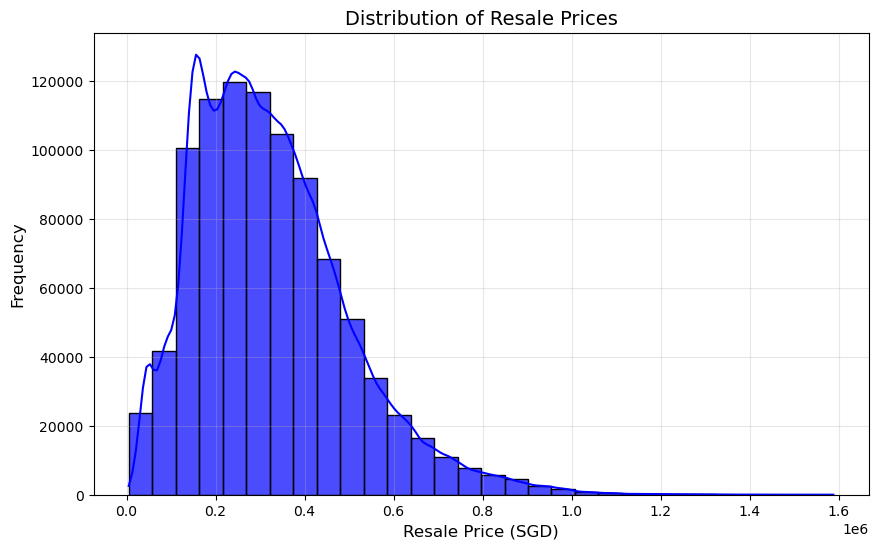

In [9]:

# Plot distribution for 'resale_price'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['resale_price'], kde=True, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.title('Distribution of Resale Prices', fontsize=14)
plt.xlabel('Resale Price (SGD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


c:\Users\firas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


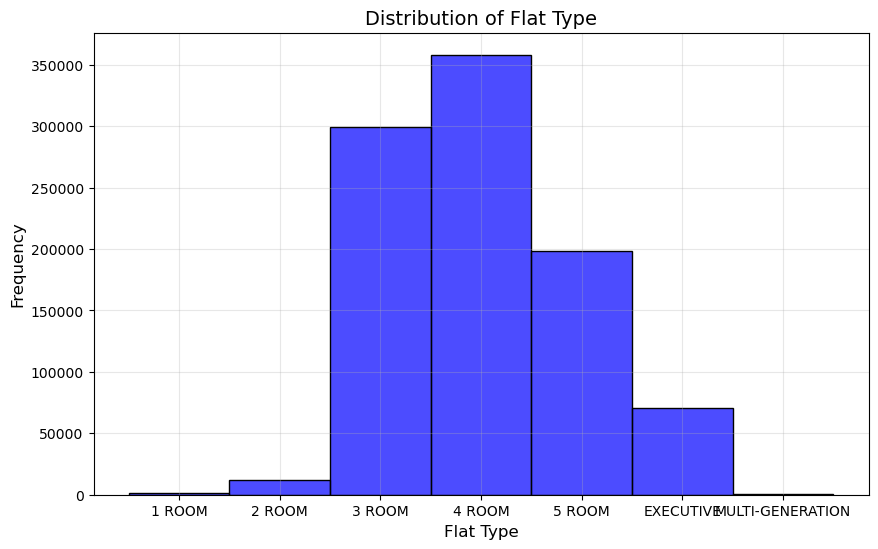

In [13]:

# Convert 'flat_type' to a categorical type with a specified order
flat_type_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
housing_data['flat_type'] = pd.Categorical(housing_data['flat_type'], categories=flat_type_order, ordered=True)

# Sort the DataFrame based on the new categorical order
housing_data = housing_data.sort_values(by='flat_type')

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=housing_data, x='flat_type', color='blue', alpha=0.7)

# Add labels and title
plt.title('Distribution of Flat Type', fontsize=14)
plt.xlabel('Flat Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()


c:\Users\firas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


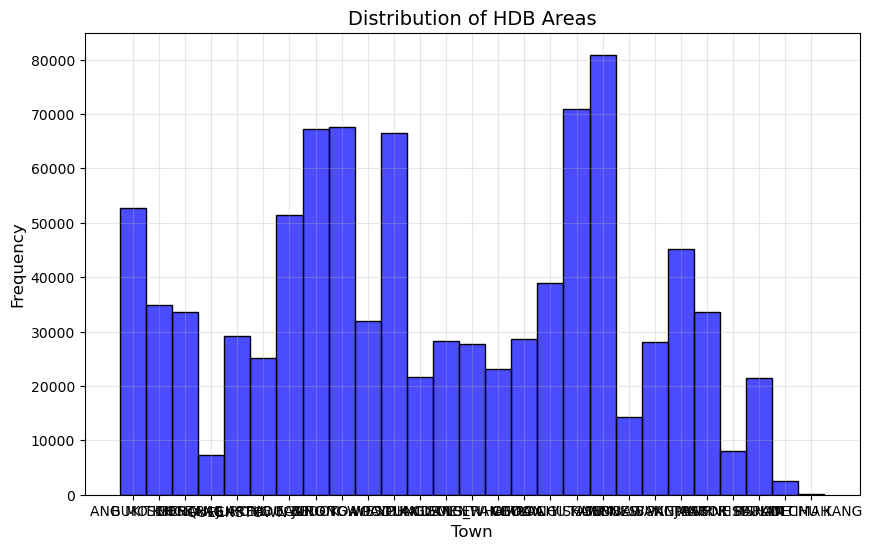

In [14]:

# Plot distribution for 'resale_price'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['town'], bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.title('Distribution of HDB Areas', fontsize=14)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Show plot
plt.show()

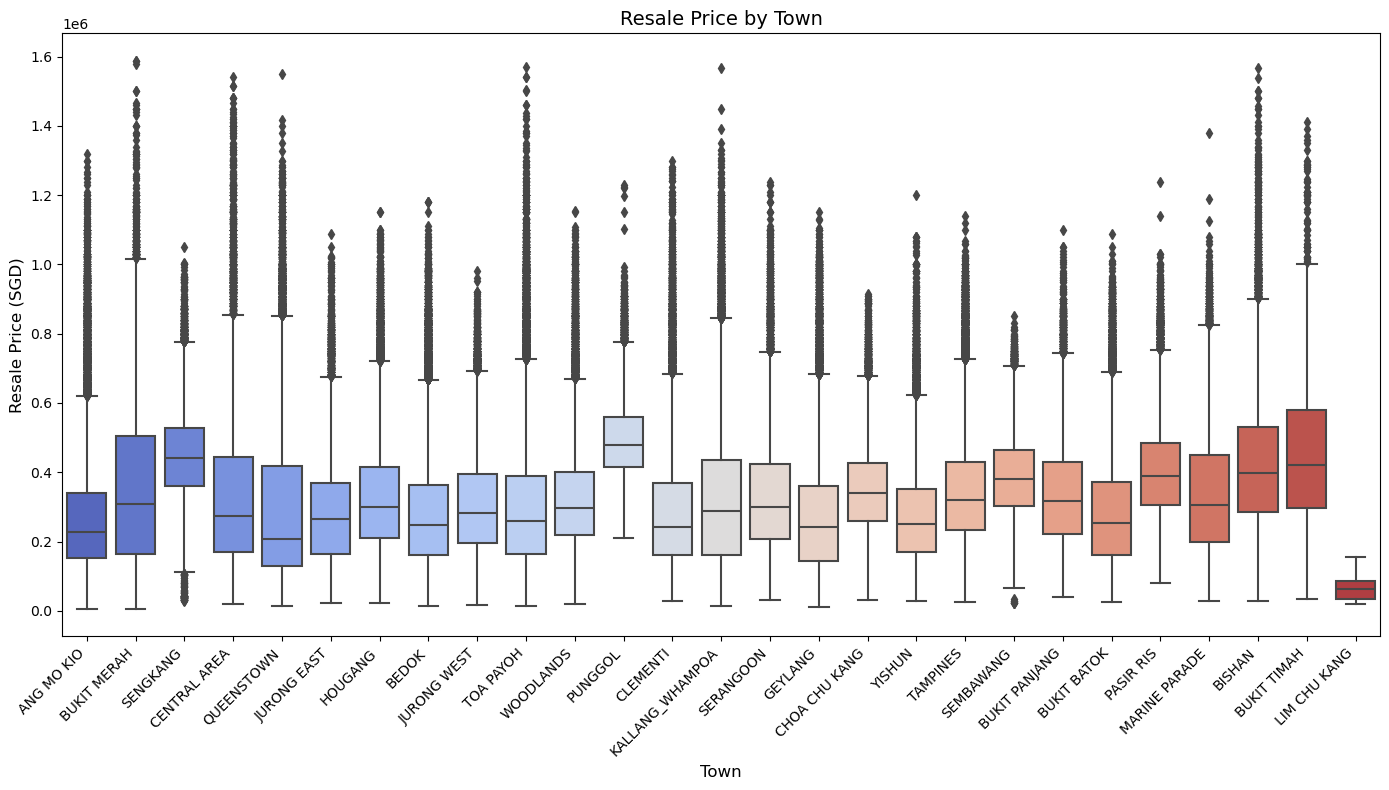

In [15]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(data=housing_data, x='town', y='resale_price', palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Resale Price by Town', fontsize=14)
plt.xlabel('Town', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


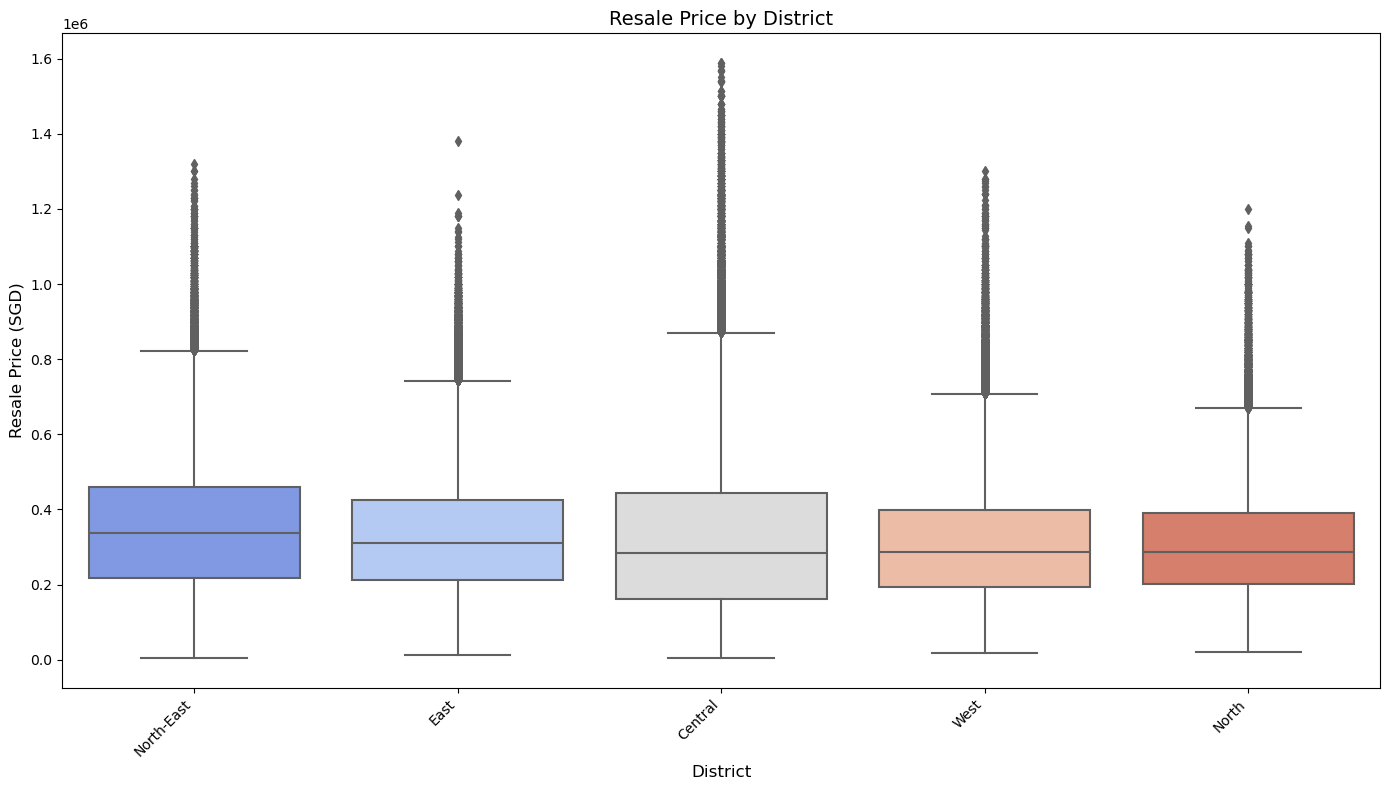

In [24]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(data=housing_data, x='district', y='resale_price', palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Resale Price by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


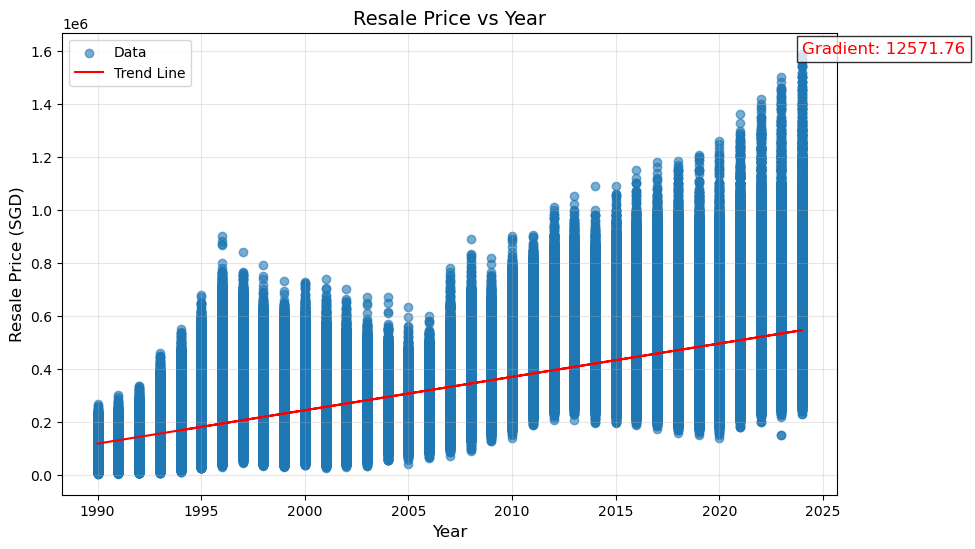

In [21]:

# Extract data
x = housing_data['year']
y = housing_data['resale_price']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Data')

# Add trend line using Numpy for linear fit
z = np.polyfit(x, y, 1)  # Linear regression (degree 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', label='Trend Line')
slope = z[0]
plt.text(x.max(), y.max(), f'Gradient: {slope:.2f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

# Add labels and title
plt.title('Resale Price vs Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show plot
plt.show()


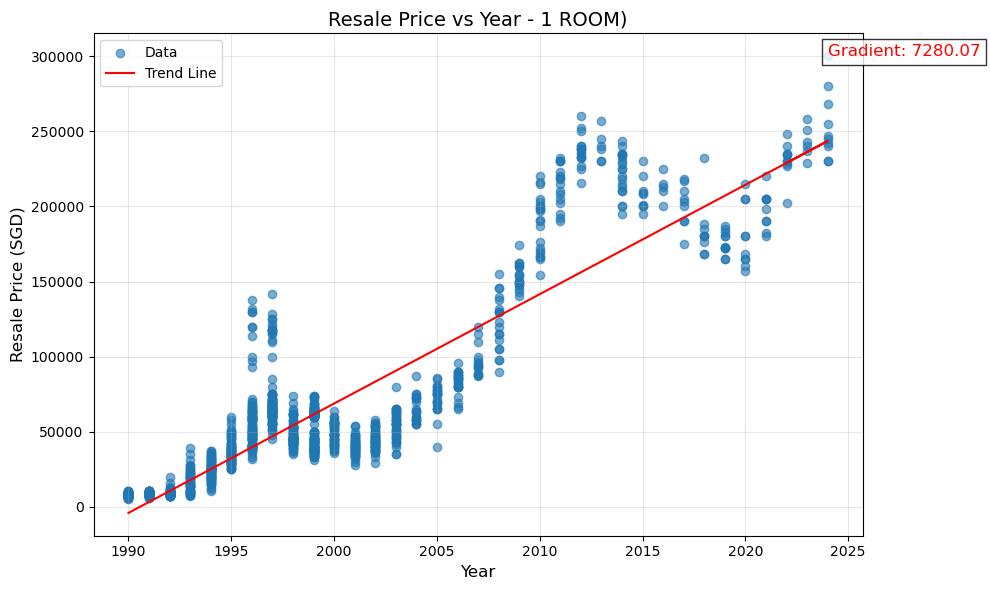

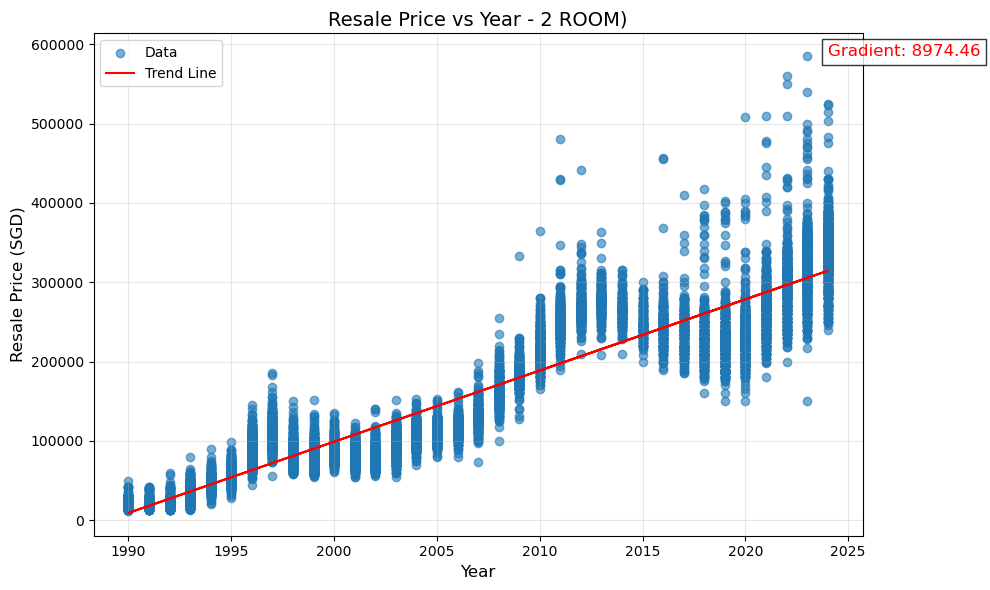

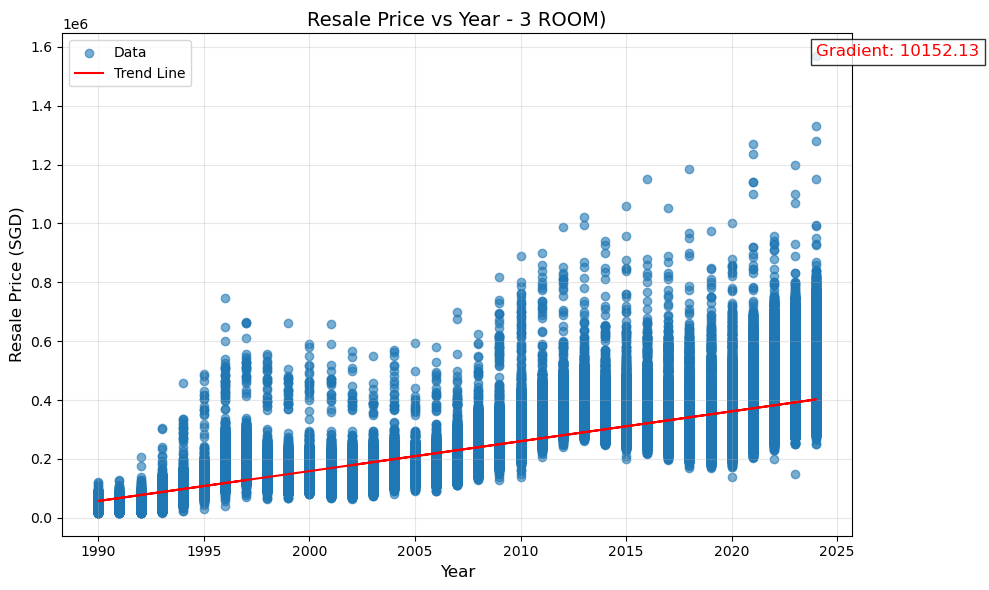

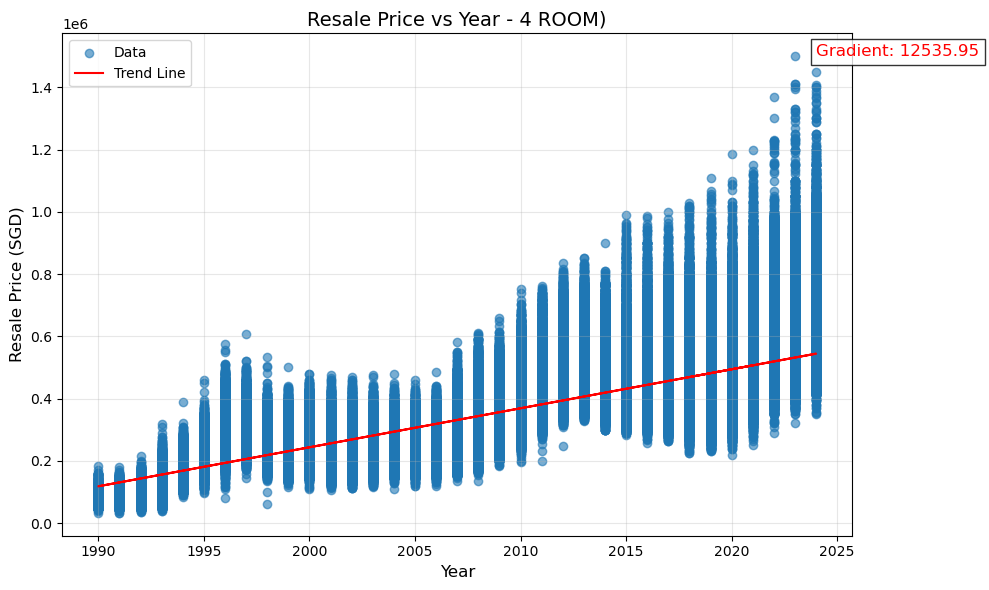

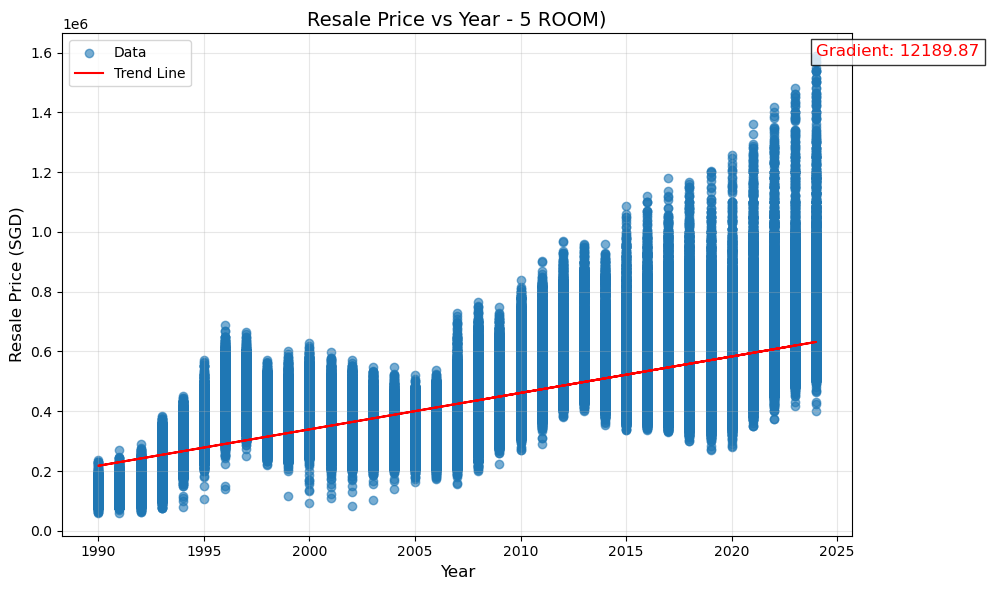

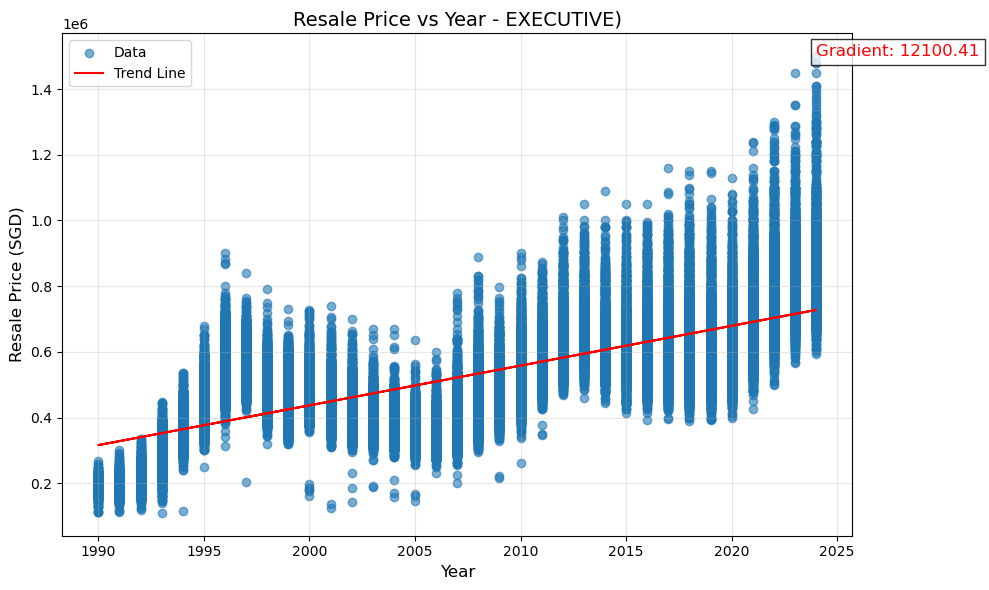

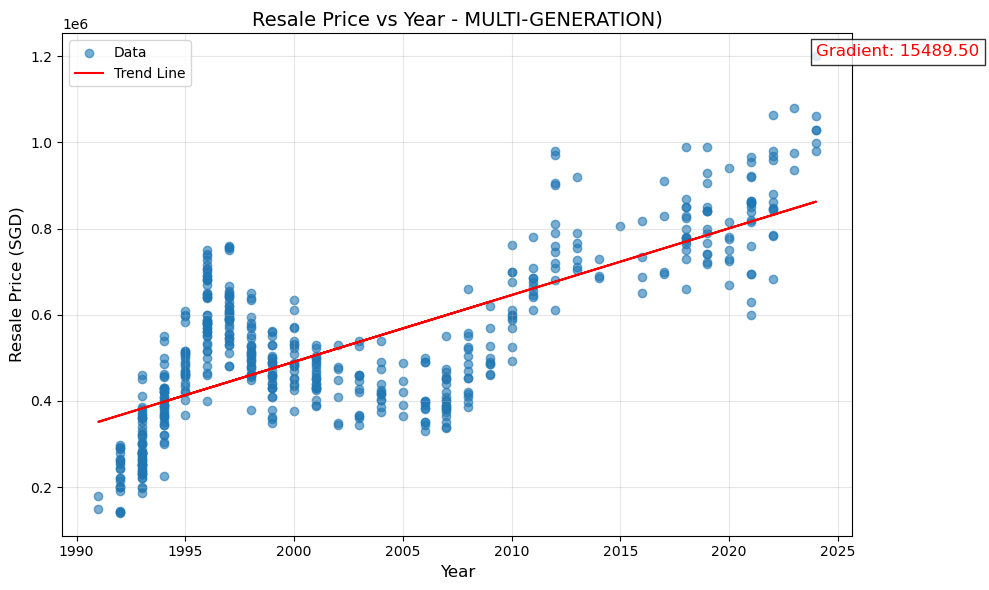

In [19]:
for flat_type in housing_data['flat_type'].unique():
    # Filter data for the current flat type
    flat_data = housing_data[housing_data['flat_type'] == flat_type]

    # Extract data
    x = flat_data['year']
    y = flat_data['resale_price']

    # Skip empty data
    if x.empty or y.empty:
        continue

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label='Data')

    # Add trend line using Numpy for linear fit
    z = np.polyfit(x, y, 1)  # Linear regression (degree 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), color='red', label='Trend Line')
    # Extract and display the gradient (slope)
    slope = z[0]
    plt.text(x.max(), y.max(), f'Gradient: {slope:.2f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

    # Add labels and title
    plt.title(f'Resale Price vs Year - {flat_type})', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Resale Price (SGD)', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)

    # Show plot
    plt.tight_layout()
    plt.show()

                 range_numeric  remaining_lease  floor_area_sqm  resale_price
range_numeric         1.000000         0.078405        0.041466      0.250472
remaining_lease       0.078405         1.000000        0.321539     -0.059736
floor_area_sqm        0.041466         0.321539        1.000000      0.551319
resale_price          0.250472        -0.059736        0.551319      1.000000


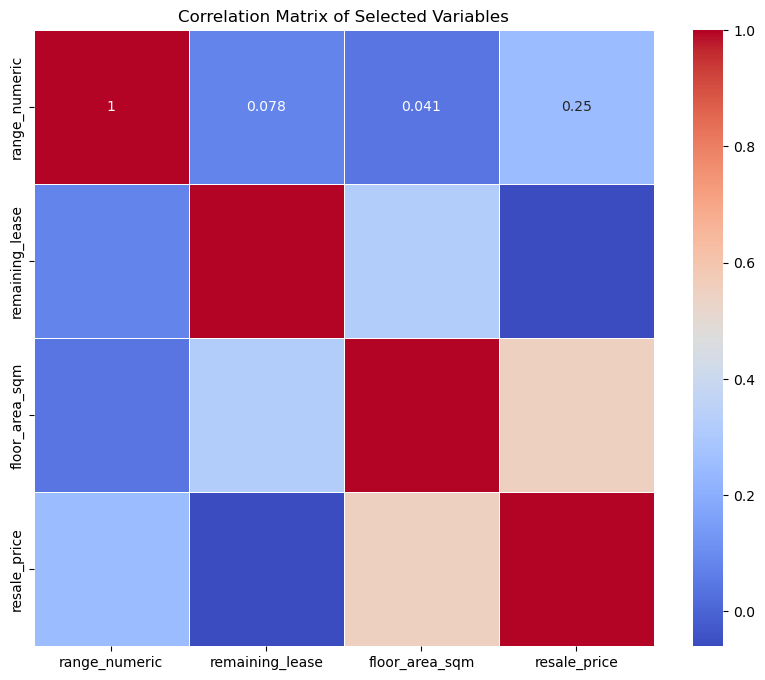

In [11]:
#correlation matrix for storey_range, remaining_lease, floor_area_sqm and resale_price
#for all years, towns, flat types


selected_columns = ['range_numeric', 'remaining_lease', 'floor_area_sqm','resale_price']
correlation_matrix = housing_data[selected_columns].corr()
# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Variables')
plt.show()


c:\Users\firas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


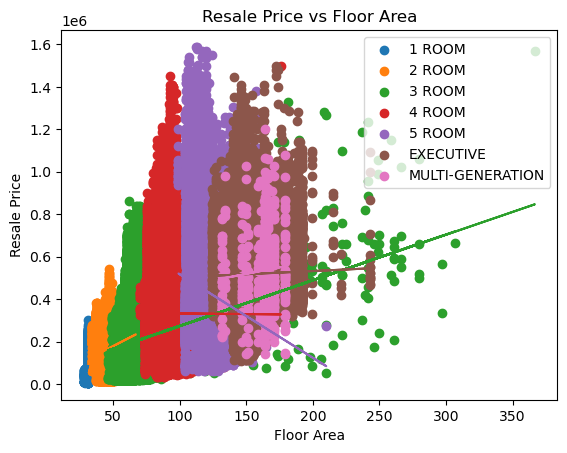

In [6]:
grouped_data = housing_data.groupby('flat_type')['resale_price'].median()
categories = grouped_data.index.tolist()
fig, ax = plt.subplots()
for category in categories:
    x = housing_data[housing_data['flat_type'] == category]['floor_area_sqm']
    y = housing_data[housing_data['flat_type'] == category]['resale_price']
    ax.scatter(x, y, label=category)
    z = np.polyfit(x.astype(int), y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x.astype(int)))
ax.set_title('Resale Price vs Floor Area')
ax.set_xlabel('Floor Area')
ax.set_ylabel('Resale Price')
ax.legend()
plt.show()

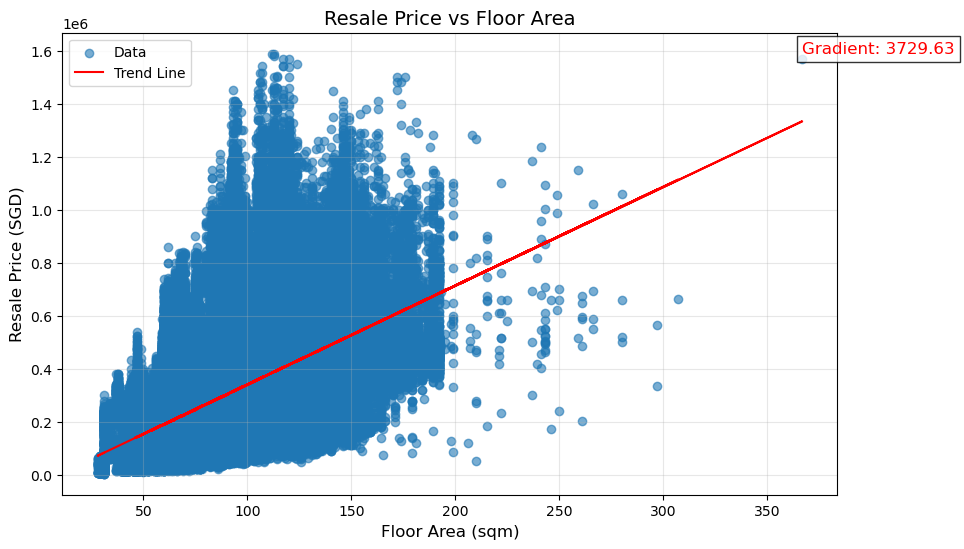

In [20]:
# Extract the data
x = housing_data['floor_area_sqm']
y = housing_data['resale_price']

# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for all data
ax.scatter(x, y, alpha=0.6, label='Data')

# Add a trend line using linear regression
z = np.polyfit(x.astype(int), y, 1)  # Degree 1 for linear fit
p = np.poly1d(z)
ax.plot(x, p(x.astype(int)), color='red', label='Trend Line')
slope = z[0]
plt.text(x.max(), y.max(), f'Gradient: {slope:.2f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

# Add labels and title
ax.set_title('Resale Price vs Floor Area', fontsize=14)
ax.set_xlabel('Floor Area (sqm)', fontsize=12)
ax.set_ylabel('Resale Price (SGD)', fontsize=12)
ax.legend(fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [22]:
print(housing_data['remaining_lease'].unique())

[ 86  85  87  88  93  89  94  90  91  95  81  92  82  78  84  80  83  76
  79  77  97  96  98  75 100  99  74  73  72 101  71  70  69  68  67  66
  65  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48
   0  47  46  45  44  43  42  41]


In [25]:
# Assuming you have a DataFrame called 'housing_data'
# and you want to find the count of a specific value in the 'flat_type' column

specific_value = 0
value_count = housing_data[housing_data['remaining_lease'] == specific_value]['remaining_lease'].count()

print(f"The count of '{specific_value}' in the 'remaining_lease' column is: {value_count}")


The count of '0' in the 'remaining_lease' column is: 16017
